# Import libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package stopwords to /Users/abdul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Import data

In [43]:
#Using polar to read the data since it is faster than pandas for large data
data=pd.read_csv('/Users/abdul/Desktop/machine learning/data/home-data-for-ml-course/NLP/Reviews.csv')

# Quick EDA

In [45]:
print(data.shape)
# reduction size of data
df=data.head(5000)

(568454, 10)


In [46]:
data.head(4)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...


In [47]:
# checking for missing values
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

Text(0.5, 0, 'Stars rating')

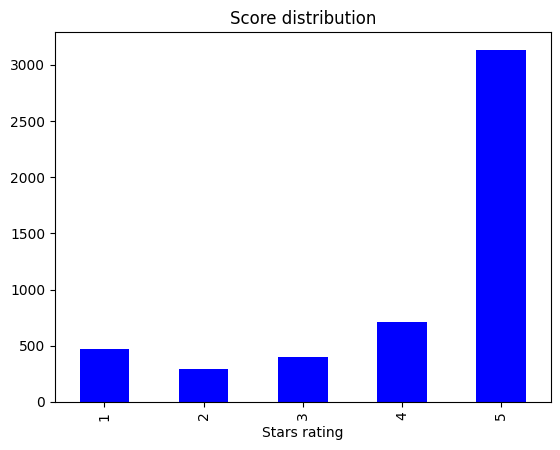

In [34]:
ax=df['Score'].value_counts().sort_index().plot(kind='bar',color='blue',title='Score distribution')
ax.set_xlabel('Stars rating')

In [39]:
df['Score'].value_counts()

Score
5    3134
4     712
1     469
3     395
2     290
Name: count, dtype: int64

We see that the score it is not uniform, we have more good grade than bad. We can assume in the dataset we will have more good sentiments.

# Pre processing